## Model Evaluation

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
data = pd.read_csv(url,names=['id', 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape','marginal_adhesion', 'SE_cell_size', 'bare_nuclei', 'bland_chromatin','normal_nucleoli', 'mitoses', 'class'], header=None)
data.head()

Populating the interactive namespace from numpy and matplotlib


,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,SE_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
#checking for missing values

print("missing values in dataset")
data= data.replace('?', np.NaN)
data.isnull().sum()

missing values in dataset


id                        0
clump_thickness           0
uniformity_cell_size      0
uniformity_cell_shape     0
marginal_adhesion         0
SE_cell_size              0
bare_nuclei              16
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [3]:
# fill missing values with mean column values
data.bare_nuclei = data.bare_nuclei.fillna(data.bare_nuclei.value_counts().index[0])
data.bare_nuclei = data.bare_nuclei.astype(int)
data.isnull().sum()

id                       0
clump_thickness          0
uniformity_cell_size     0
uniformity_cell_shape    0
marginal_adhesion        0
SE_cell_size             0
bare_nuclei              0
bland_chromatin          0
normal_nucleoli          0
mitoses                  0
class                    0
dtype: int64

In [4]:
## Changing class values: 2-benign ,4-malignan) -> 0-benign, 1-malignant
data['class'] = data['class'].replace(2, 0)
data['class'] = data['class'].replace(4, 1)
data.head()

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,SE_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [5]:
data['class'].value_counts()

0    458
1    241
Name: class, dtype: int64

In [6]:
dataset = np.array(data)
X = dataset[:, 0:dataset.shape[1]-1]
y = dataset[:, -1]
print("X",X.shape ,"y",y.shape)

X (699, 10) y (699,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train",X_train.shape,"X_test", X_test.shape)
print("y_train",y_train.shape,"y_test", y_test.shape)

X_train (489, 10) X_test (210, 10)
y_train (489,) y_test (210,)


In [8]:
### Using scikit-learn’s DecisionTreeClassifier, train the model
#after hyperparameter tuning selected max_depth=5 as optimal value

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)

### 1. Accuracy of the model

In [16]:
#predict on test-set

from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("accuracy score",accuracy_score(y_test, y_pred))

accuracy score 0.9428571428571428


#### The Accuracy of this model on the test dataset is 94.28%

### 2. Precision

In [32]:
from sklearn.metrics import precision_score
print("precision", precision_score(y_test, y_pred))

precision 0.9365079365079365


#### The Precision of this model on the test dataset is 93.65% . 
#### This means that among all the instances that the model predicts to be positive (malignant), 93.65% of them are true positive and rest are false positive. This indicates that the model performs good on the test dataset.

### Recall

In [33]:
from sklearn.metrics import recall_score
print("Recall", recall_score(y_test, y_pred))

Recall 0.8805970149253731


#### The Recall of this model on the test dataset is around 88 % .
#### This means that among the instances that are actually positive (malignant), the model predicts  88% of them as positive.

### 3. Classification report

In [67]:
from sklearn.metrics import classification_report
target_names = ['benign', 'malignant']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      benign       0.95      0.97      0.96       143
   malignant       0.94      0.88      0.91        67

   micro avg       0.94      0.94      0.94       210
   macro avg       0.94      0.93      0.93       210
weighted avg       0.94      0.94      0.94       210



### 4. The confusion matrix for this experiment

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[139,   4],
       [  8,  59]])

### 5. ROC curve

In [17]:
from sklearn.metrics import roc_curve, auc
y_score = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_score)

In [18]:
fpr

array([0.        , 0.01398601, 0.02797203, 0.02797203, 0.04895105,
       1.        ])

In [19]:
tpr

array([0.        , 0.62686567, 0.86567164, 0.88059701, 0.88059701,
       1.        ])

In [64]:
#compute AUC from ROC curve
auc_val = auc(fpr, tpr)
auc_val

0.9275649723410918

### The area under the curve is around 0.93

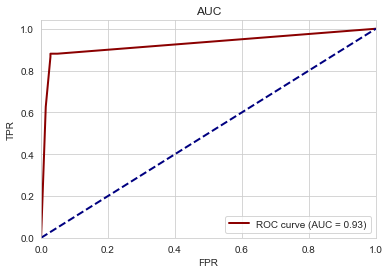

In [65]:
##Cite: Referred stackoverflow: https://stackoverflow.com/questions/34564830/roc-curve-with-sklearn-python

#plot roc curve
plt.figure()
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (AUC = %0.2f)' % auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.04])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC')
plt.legend(loc="lower right")
plt.show()

### 6. Precision/Recall curve

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision, recall, _ = precision_recall_curve(y_test, y_score)

In [27]:
precision

array([0.31904762, 0.89393939, 0.93650794, 0.93548387, 0.95454545,
       1.        ])

In [28]:
recall

array([1.        , 0.88059701, 0.88059701, 0.86567164, 0.62686567,
       0.        ])

In [70]:
avg_precision = average_precision_score(y_test, y_score)
print("average_precision: ",avg_precision)

average_precision:  0.8738438793325649


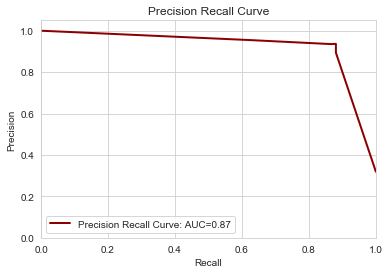

In [71]:
plt.clf()
plt.plot(recall, precision, lw=2, color='darkred',
         label='Precision Recall Curve: AUC={0:0.2f}'.format(avg_precision))
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower left")
plt.show()